### Import necessary libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.formula.api import ols
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from math import sqrt

import scipy, matplotlib
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings


mainData = pd.read_csv('clean_filter_dataframe.csv')
sb.set() # set the default Seaborn style for graphics
mainData.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
count,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,...,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000
mean,2007.369579,0.260723,0.139294,0.037282,0.048949,0.486453,70.496872,28.914995,7.216677,129.731607,...,0.089105,0.082848,0.073355,0.063646,0.064941,0.048975,0.035599,0.034736,0.027184,0.028263
std,4.069156,0.276439,0.183665,0.117220,0.068543,0.465979,12.903368,18.224541,1.381018,426.797953,...,0.284925,0.275682,0.260746,0.244148,0.246448,0.215839,0.185307,0.183129,0.162638,0.165742
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,21.000000,3.000000,0.500000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,0.070000,0.020000,0.000000,0.010000,0.140000,63.000000,15.000000,6.500000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.160000,0.060000,0.000000,0.020000,0.320000,72.000000,25.000000,7.500000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2010.000000,0.360000,0.190000,0.010000,0.060000,0.690000,80.000000,40.000000,8.200000,77.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2016.000000,1.820000,1.580000,1.490000,1.180000,2.070000,98.000000,106.000000,9.600000,10665.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2]:
data = mainData.drop(["Name", 'Developer', 'Publisher', 'Rating', 'Platform', 'Genre'],axis=1)
data.head()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
0,2005.0,1.77,0.12,0.02,0.17,2.07,72.0,21.0,7.8,54.0,...,0,0,0,0,0,0,0,0,0,0
1,2006.0,0.92,0.93,0.00,0.22,2.07,49.0,5.0,5.2,24.0,...,0,0,0,0,0,0,0,0,0,0
2,2007.0,1.35,0.52,0.00,0.19,2.07,73.0,16.0,7.1,27.0,...,1,0,0,0,0,0,0,0,0,0
3,2014.0,0.36,1.38,0.02,0.31,2.07,71.0,85.0,6.1,1571.0,...,0,0,0,0,0,0,0,1,0,0
4,2009.0,1.48,0.39,0.00,0.19,2.06,83.0,68.0,7.9,51.0,...,0,0,1,0,0,0,0,0,0,0


In [3]:
mainData_dummies = data
mainData_dummies.iloc[:,5:].head(5)
import numpy as np# Labels are the values we want to predict
labels = np.array(mainData_dummies['Global_Sales'])# Remove the labels from the features
# axis 1 refers to the columns
mainData_dummies=  mainData_dummies.drop('Global_Sales', axis = 1)# Saving feature names for later use
mainData_dummies = mainData_dummies.drop("NA_Sales", axis = 1)
mainData_dummies = mainData_dummies.drop("EU_Sales", axis = 1)
mainData_dummies = mainData_dummies.drop("JP_Sales", axis = 1)
mainData_dummies = mainData_dummies.drop("Other_Sales", axis = 1)

mainData_list = list(mainData_dummies.columns)# Convert to numpy array
mainData_dummies = np.array(mainData_dummies)
from sklearn.model_selection import train_test_split# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mainData_dummies, labels, test_size = 0.20, random_state = 42)

## Lasso

Lasso regression is a L1 regularisation that adds a penalty proportional to the  absolute value of the magnitude of coefficients. The alpha is a parameter which balances the amount of emphasis given to minimising RSS vs minimising absolute value of coefficients.

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.22280382163258827
Mean Squared Error (MSE) 	: 0.1643635393949279

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.2240757811772074
Mean Squared Error (MSE) 	: 0.18487325405990138



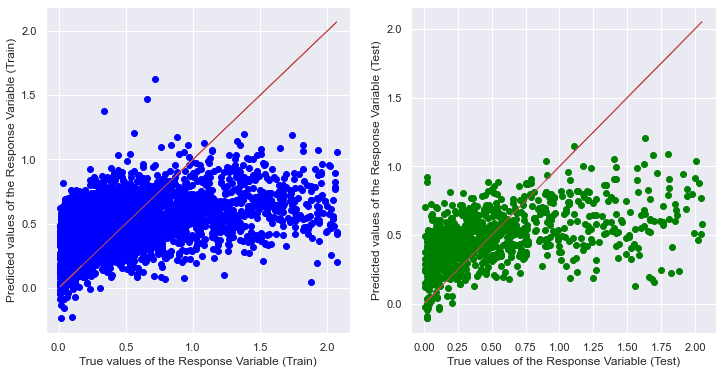

In [5]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 

# Predict Total values corresponding to HP
y_train_pred = model_lasso.predict(X_train)
y_test_pred = model_lasso.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model_lasso.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model_lasso.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

plt.show()

The r squared value of the train dataset was 0.22 and the test dataset was also 0.22. Both had approximately the same r squared value. This is an improvement from the random forest regression model as the difference in r squared value here is very low. However, the r squared value for both train and test were relatively low and we felt that the lasso regression model was not a good one. This could be because if there are two or more highly collinear variables then Lasso regression selects one of them randomly which is not good for the interpretation of data.

Hence, our group decided to also use the ridge regression which is L2 regularisation. The difference between lasso and ridge is that lasso penalises the absolute value of the magnitude of coefficients while Ridge penalises the square of the magnitude of coefficients

## Ridge Regression

Ridge Regression which is L2 regularisation. The difference between Lasso and Ridge is that Lasso penalises the absolute value of the magnitude of coefficients while Ridge penalises the square of the magnitude of coefficients.

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.520613137816371
Mean Squared Error (MSE) 	: 0.10138202374263457

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.29063200585272697
Mean Squared Error (MSE) 	: 0.16901543504199112



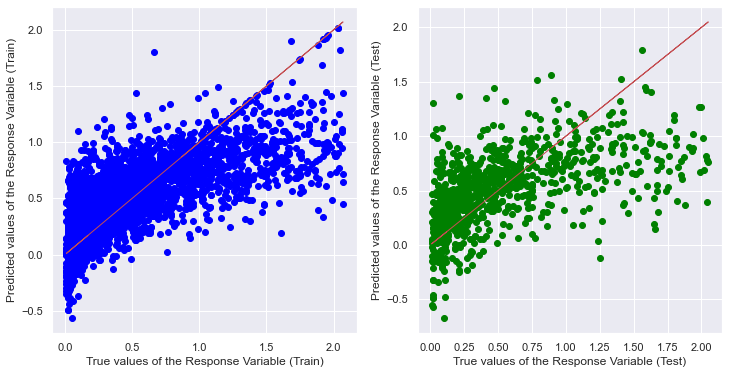

In [4]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 

# Predict Total values corresponding to HP
y_train_pred = rr.predict(X_train)
y_test_pred = rr.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", rr.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", rr.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

plt.show()

Since using the Ridge Regression machine learning model, we then dive deeper into the model to find out the feature importance of each variable and how much impact they have in affecting global sales. Here shows each variable and their importance value. A higher number means that they have a higher contributing factor towards the global sales of video games.